In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from roboflow import Roboflow
from segment_anything import SamPredictor, sam_model_registry
# from segment_anything_2.sam2.build_sam import build_sam2
# from segment_anything_2.sam2.sam2_image_predictor import SAM2ImagePredictor
from utils import ROBOFLOW_API_KEY
import json
import boto3
import numpy as np

In [2]:
rf = Roboflow(ROBOFLOW_API_KEY)
project = rf.workspace().project("final_annotation_classification")
model = project.version(2).model

loading Roboflow workspace...
loading Roboflow project...


In [3]:
sam = sam_model_registry["default"](checkpoint="../../../Downloads/sam_vit_h_4b8939.pth")
sam_predictor = SamPredictor(sam)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [4]:
from helper_code.pipeline import run_pipeline

IMAGE #19764
Directory '../results/19764' already exists.


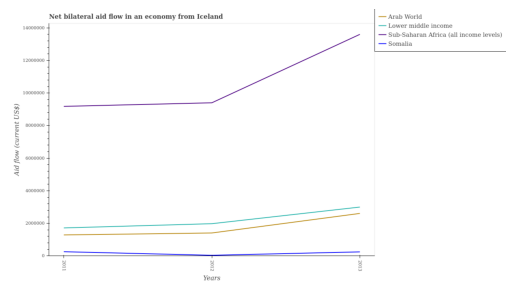

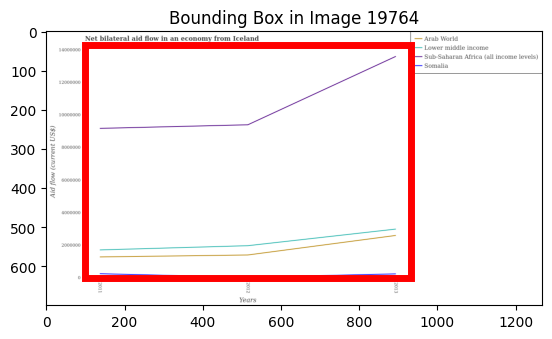

GPT FAULTED
{'x-axis': {'title': 'X Axis Title', 'range': [0, 100]}, 'y-axis': {'title': 'Y Axis Title', 'range': [0, 100]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Type 1', 'red'], ['Type 2', 'blue'], ['Type 3', 'green']]}
{'x-axis': {'title': 'X Axis Title', 'range': [0, 100]}, 'y-axis': {'title': 'Y Axis Title', 'range': [0, 100]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Type 1', 'red'], ['Type 2', 'blue'], ['Type 3', 'green']]}


<Figure size 640x480 with 0 Axes>

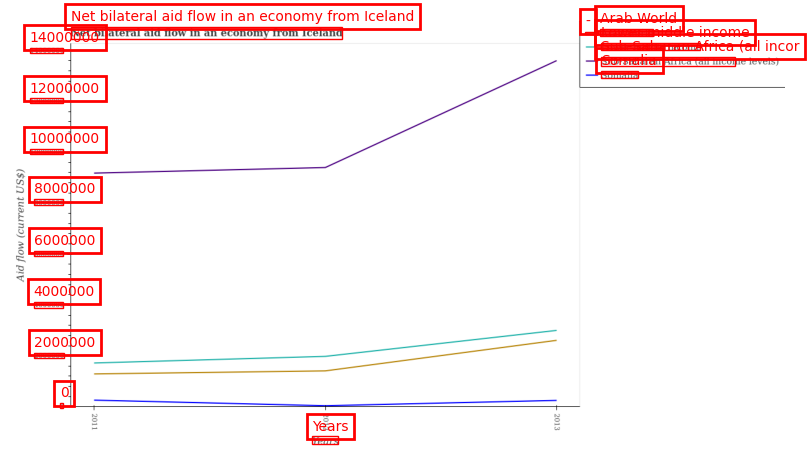

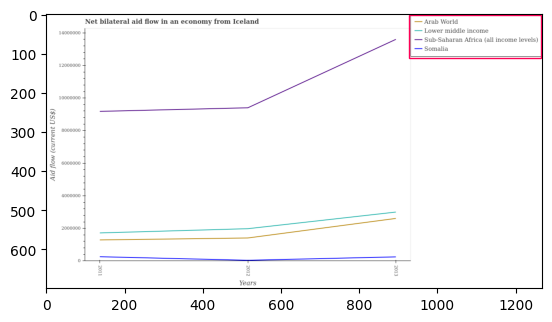

{'x': 1095.5, 'y': 56.5, 'width': 339.0, 'height': 109.0, 'confidence': 0.9240306615829468, 'class': 'legend', 'class_id': 1, 'detection_id': '6cfa7ec1-fd58-4311-8bbd-ca6f1eb09edd', 'image_path': '../plot_images/19764.png', 'prediction_type': 'ObjectDetectionModel'}


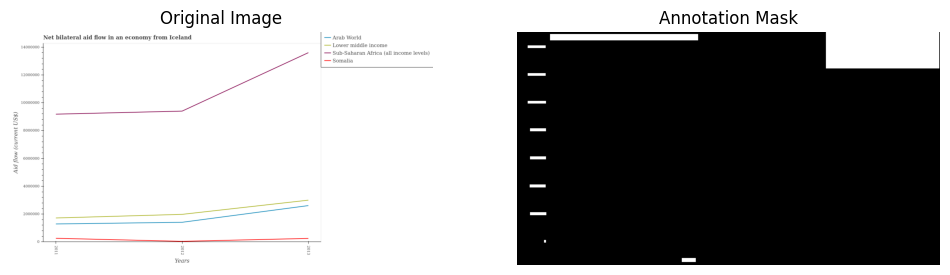

LEGEND ITEM Arab World
LEGEND ITEM Lower middle income
LEGEND ITEM Sub-Saharan Africa (all incor
LEGEND ITEM Somalia
[{'text': 'Arab World', 'text_location': [[965, 12], [1051, 12], [1051, 24], [965, 24]], 'marker': [(220, 195, 133), (184, 134, 11), (188, 188, 188), (67, 67, 67), (228, 209, 162)]}, {'text': 'Lower middle income', 'text_location': [[966, 35], [1129, 35], [1129, 47], [966, 47]], 'marker': [(144, 217, 213), (32, 178, 170), (65, 65, 65), (183, 183, 183), (231, 231, 231)]}, {'text': 'Sub-Saharan Africa (all incor', 'text_location': [[966, 58], [1186, 58], [1186, 73], [966, 73]], 'marker': [(165, 128, 193), (75, 0, 130), (183, 183, 183), (65, 65, 65), (187, 158, 207)]}, {'text': 'Somalia', 'text_location': [[967, 81], [1027, 81], [1027, 93], [967, 93]], 'marker': [(128, 128, 255), (0, 0, 255), (183, 183, 183), (65, 65, 65), (158, 158, 255)]}]
Y MIN 0
Y MAX 14000000
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 14000000.0
Y
OCR DIFF -582.0
SEM DIFF 14000000.0
OCR RATIO -4.157142857142857

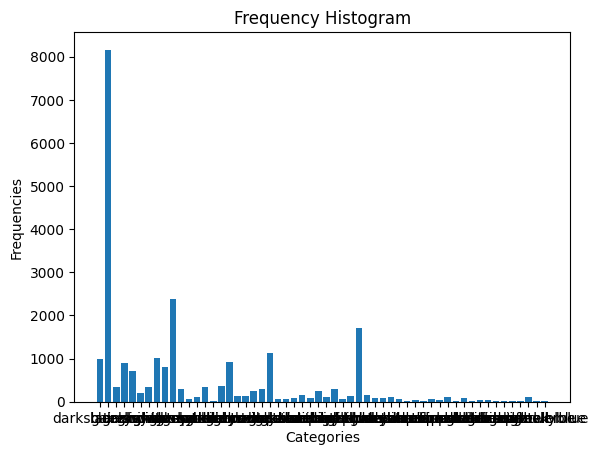

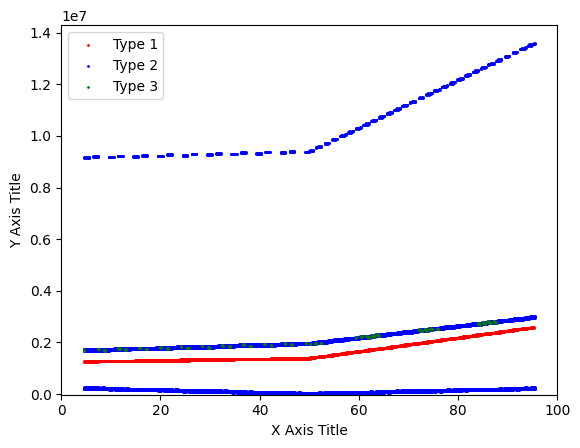

SUCCEEDED ON IMAGE 19764


In [5]:
for image_num in [19764]:
    print("IMAGE #" + str(image_num))
    image_name = '../plot_images/' + str(image_num) + '.png'
    image_bgr = cv2.imread(image_name)
    image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.axis('off') 
    plt.imshow(image)
    try:
        run_pipeline(image_num, 200, sam_predictor, model)
        print("SUCCEEDED ON IMAGE", image_num)
    except:
        print("FAILED ON IMAGE", image_num)

IMAGE #19764
Directory '../results/19764' already exists.


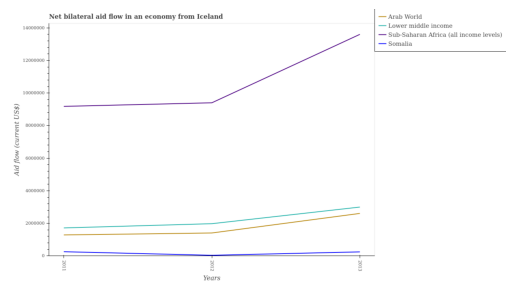

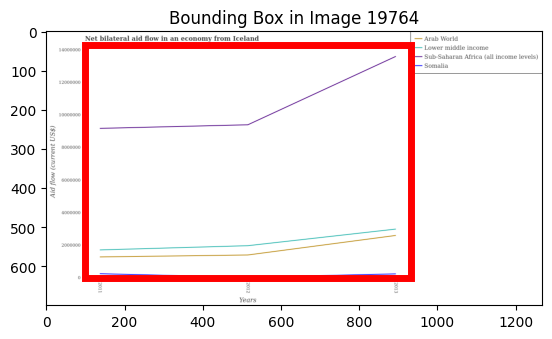

{'x-axis': {'title': 'Years', 'range': [2011, 2013]}, 'y-axis': {'title': 'Aid flow (current US$)', 'range': [0, 14000000]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Arab World', 'orange'], ['Lower middle income', 'green'], ['Sub-Saharan Africa (all income levels)', 'purple'], ['Somalia', 'blue']]}
{'x-axis': {'title': 'Years', 'range': [2011, 2013]}, 'y-axis': {'title': 'Aid flow (current US$)', 'range': [0, 14000000]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Arab World', 'orange'], ['Lower middle income', 'green'], ['Sub-Saharan Africa (all income levels)', 'purple'], ['Somalia', 'blue']]}


<Figure size 640x480 with 0 Axes>

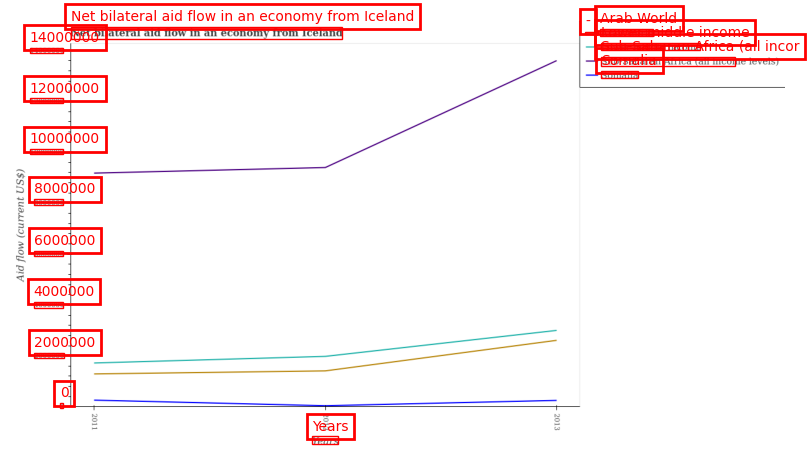

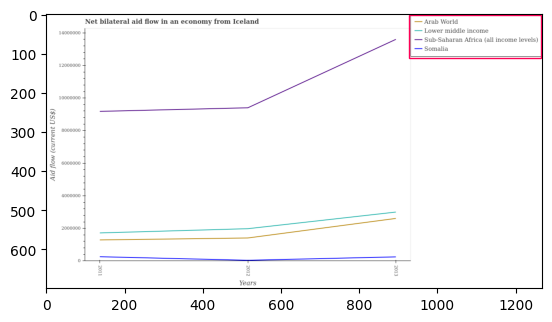

{'x': 1095.5, 'y': 56.5, 'width': 339.0, 'height': 109.0, 'confidence': 0.9240306615829468, 'class': 'legend', 'class_id': 1, 'detection_id': 'bf39257c-c371-4440-88a8-d13a3f46a495', 'image_path': '../plot_images/19764.png', 'prediction_type': 'ObjectDetectionModel'}


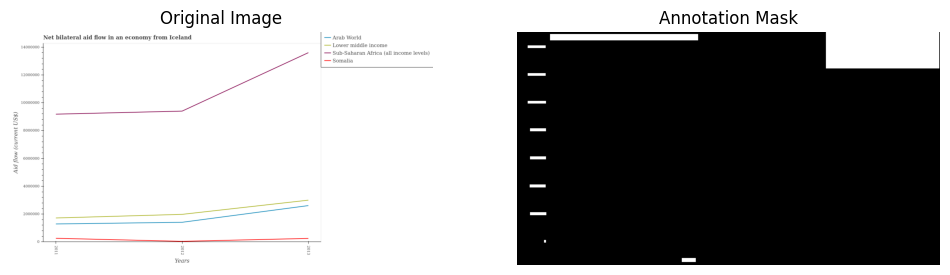

LEGEND ITEM Arab World
LEGEND ITEM Lower middle income
LEGEND ITEM Sub-Saharan Africa (all incor
LEGEND ITEM Somalia
Y MIN 0
Y MAX 14000000
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 14000000.0
Y
OCR DIFF -582.0
SEM DIFF 14000000.0
OCR RATIO -4.157142857142857e-05
PIXEL DIFF -1.0
REAL DIFF FROM BASE POINT 24054.98281786942
Y_MIN -24054.98281786942
Y_MAX 14288659.793814434
x is in fault condition
{'white': 863462, 'darkslategrey': 983, 'black': 8162, 'grey': 348, 'gainsboro': 906, 'darkgray': 721, 'snow': 199, 'silver': 342, 'lightgrey': 1014, 'dimgrey': 804, 'whitesmoke': 2381, 'lavender': 285, 'lightslategrey': 60, 'peru': 104, 'darkgoldenrod': 350, 'blanchedalmond': 16, 'saddlebrown': 376, 'maroon': 921, 'burlywood': 141, 'mediumturquoise': 129, 'lightseagreen': 242, 'darkcyan': 288, 'teal': 1136, 'lightblue': 62, 'ghostwhite': 65, 'darkslateblue': 90, 'mediumpurple': 154, 'slateblue': 96, 'indigo': 256, 'thistle': 107, 'midnightblue': 302, 'plum': 74, 'royalblue': 126, 'blue': 1699, 'mediums

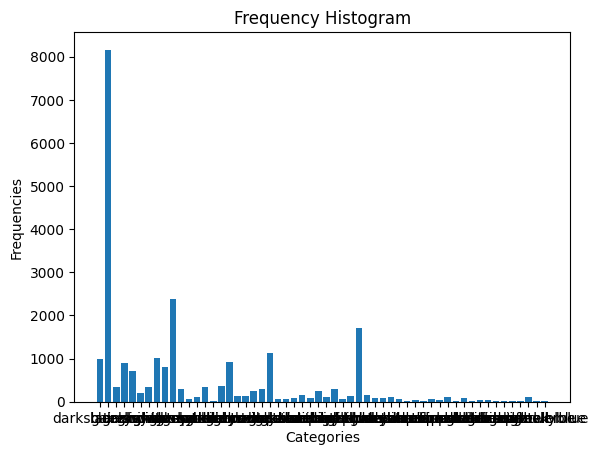

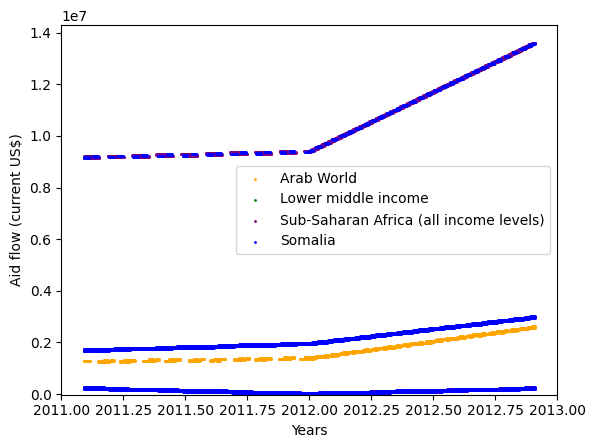

SUCCEEDED ON IMAGE 19764
IMAGE #17074
Directory '../results/17074' already exists.


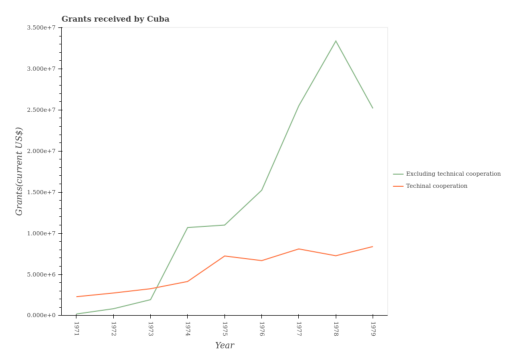

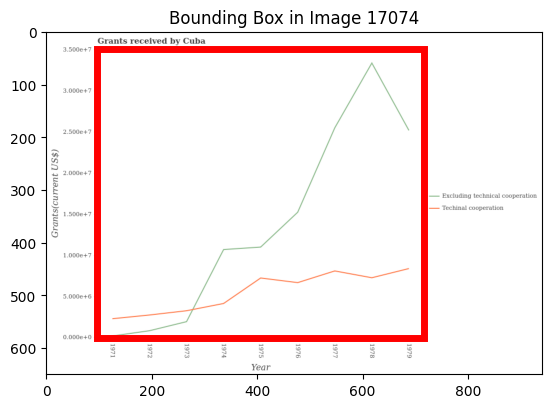

{'x-axis': {'title': 'Year', 'range': [1970, 1980]}, 'y-axis': {'title': 'Grants (current US$)', 'range': [0, 35000000]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Excluding technical cooperation', 'green'], ['Technical cooperation', 'orange']]}
{'x-axis': {'title': 'Year', 'range': [1970, 1980]}, 'y-axis': {'title': 'Grants (current US$)', 'range': [0, 35000000]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Excluding technical cooperation', 'green'], ['Technical cooperation', 'orange']]}


<Figure size 640x480 with 0 Axes>

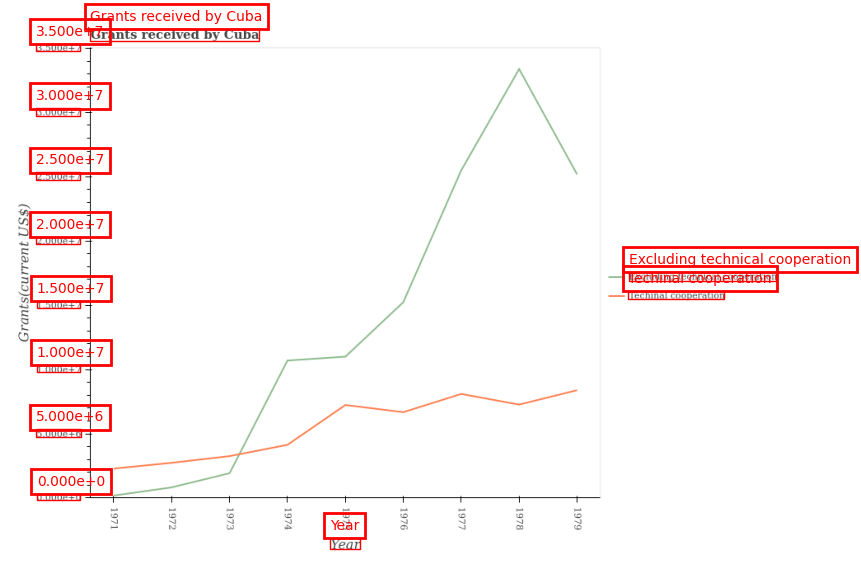

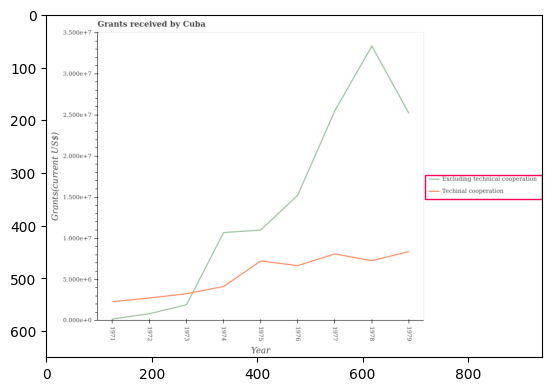

{'x': 829.5, 'y': 326.0, 'width': 221.0, 'height': 46.0, 'confidence': 0.9062904119491577, 'class': 'legend', 'class_id': 1, 'detection_id': '58eb265a-e78c-4d68-854b-3d0cdbe8c4e6', 'image_path': '../plot_images/17074.png', 'prediction_type': 'ObjectDetectionModel'}


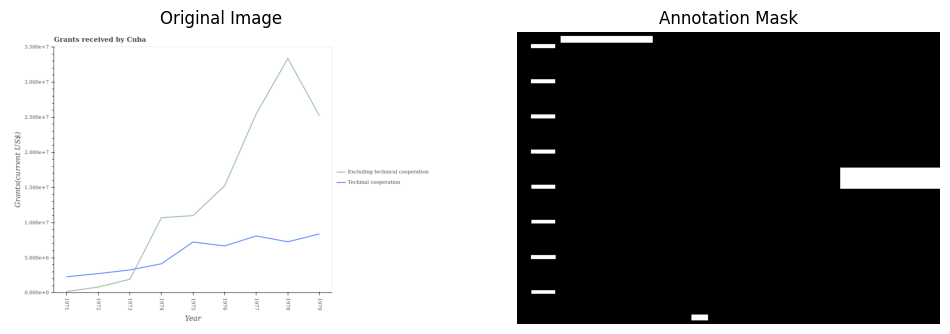

LEGEND ITEM Excluding technical cooperation
LEGEND ITEM Techinal cooperation
Y MIN 0.000e+0
Y MAX 3.500e+7
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 35000000.0
Y
OCR DIFF -545.5
SEM DIFF 35000000.0
OCR RATIO -1.5585714285714287e-05
PIXEL DIFF -1.0
REAL DIFF FROM BASE POINT 64161.31989000916
Y_MIN -64161.31989000916
Y_MAX 35032080.659945
x is in fault condition
{'white': 595531, 'whitesmoke': 1747, 'dimgrey': 307, 'black': 4279, 'darkslategrey': 899, 'darkgray': 509, 'lightgrey': 924, 'grey': 415, 'gainsboro': 1044, 'lightslategrey': 127, 'snow': 117, 'ghostwhite': 636, 'silver': 412, 'lavender': 714, 'mediumseagreen': 155, 'seagreen': 277, 'forestgreen': 1186, 'darkseagreen': 379, 'honeydew': 86, 'mintcream': 70, 'beige': 65, 'lightsalmon': 171, 'red': 796, 'tomato': 111, 'mistyrose': 51, 'lightpink': 56, 'antiquewhite': 15, 'orangered': 257, 'salmon': 27, 'peachpuff': 86, 'blanchedalmond': 13, 'seashell': 30, 'bisque': 33, 'coral': 93, 'linen': 21, 'floralwhite': 7, 'darkolivegreen': 1, 'sadd

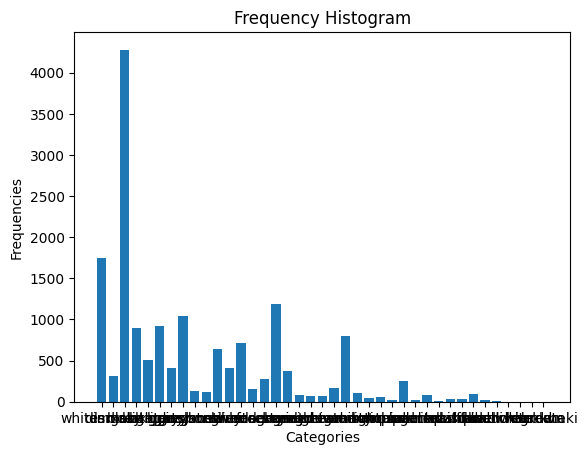

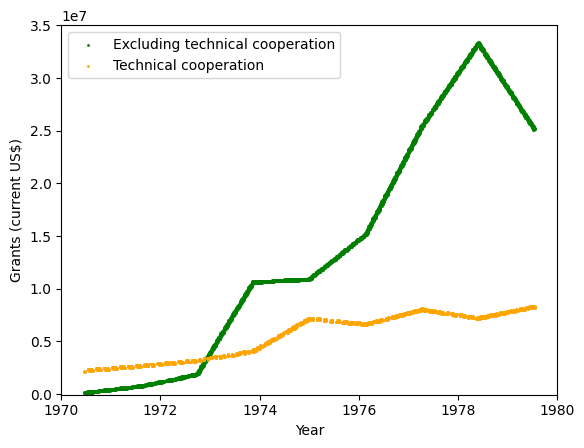

SUCCEEDED ON IMAGE 17074
IMAGE #4759
Directory '../results/4759' already exists.


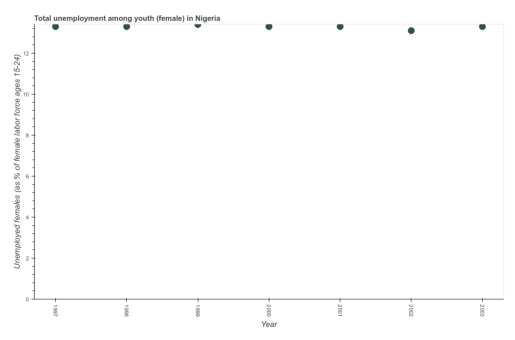

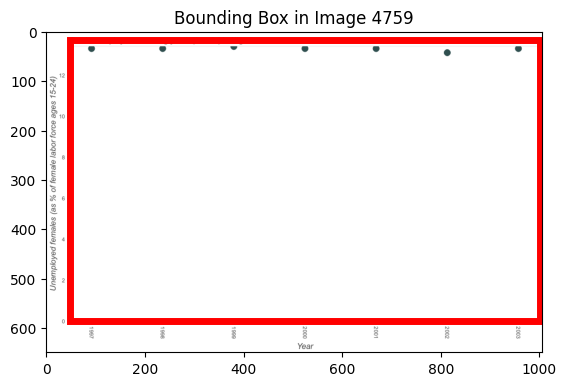

GPT FAULTED
{'x-axis': {'title': 'X Axis Title', 'range': [0, 100]}, 'y-axis': {'title': 'Y Axis Title', 'range': [0, 100]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Type 1', 'red'], ['Type 2', 'blue'], ['Type 3', 'green']]}
{'x-axis': {'title': 'X Axis Title', 'range': [0, 100]}, 'y-axis': {'title': 'Y Axis Title', 'range': [0, 100]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Type 1', 'red'], ['Type 2', 'blue'], ['Type 3', 'green']]}


<Figure size 640x480 with 0 Axes>

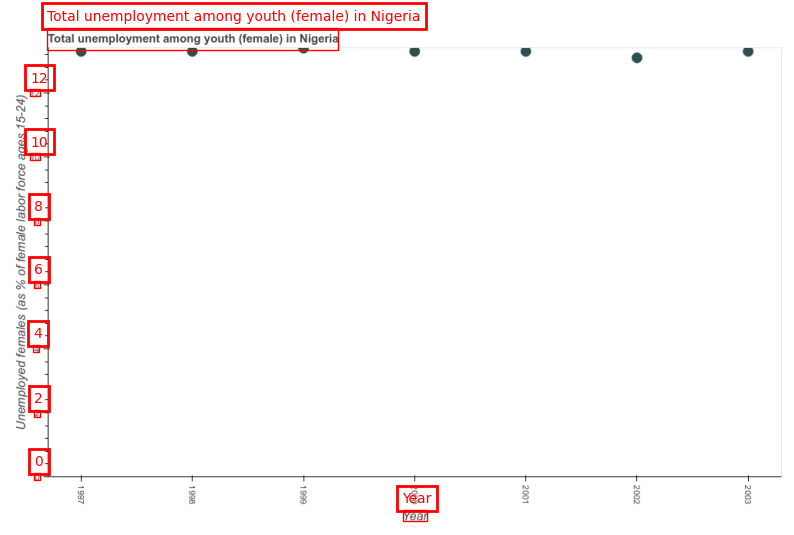

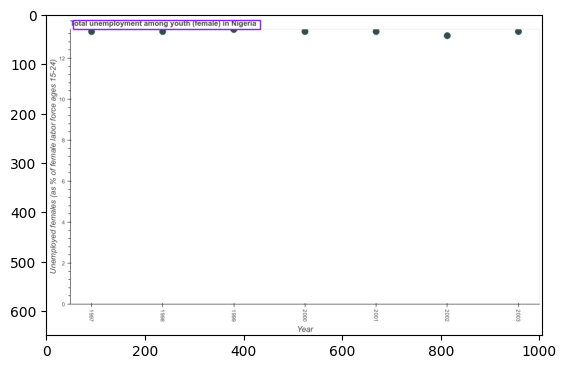

{'x': 244.0, 'y': 19.5, 'width': 380.0, 'height': 17.0, 'confidence': 0.5893482565879822, 'class': 'annotation', 'class_id': 0, 'detection_id': 'd56a08e5-aa42-498e-b461-89cb927c2087', 'image_path': '../plot_images/4759.png', 'prediction_type': 'ObjectDetectionModel'}


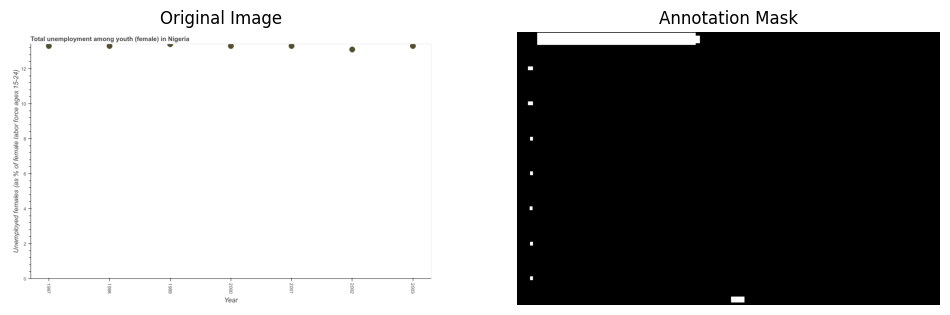

FAILED ON IMAGE 4759
IMAGE #19017
Directory '../results/19017' already exists.


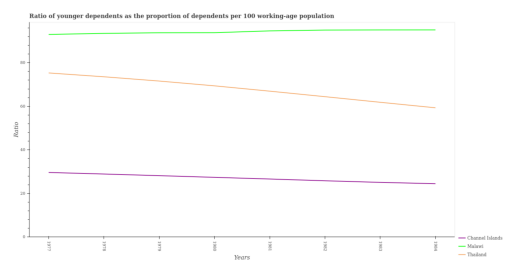

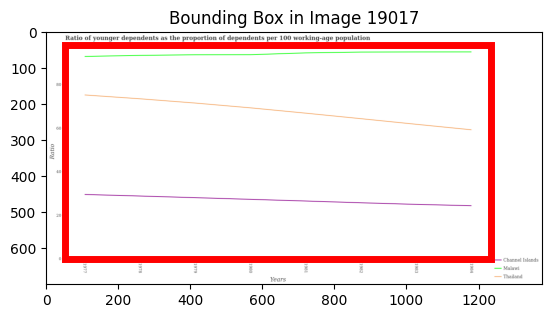

GPT FAULTED
{'x-axis': {'title': 'X Axis Title', 'range': [0, 100]}, 'y-axis': {'title': 'Y Axis Title', 'range': [0, 100]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Type 1', 'red'], ['Type 2', 'blue'], ['Type 3', 'green']]}
{'x-axis': {'title': 'X Axis Title', 'range': [0, 100]}, 'y-axis': {'title': 'Y Axis Title', 'range': [0, 100]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Type 1', 'red'], ['Type 2', 'blue'], ['Type 3', 'green']]}


<Figure size 640x480 with 0 Axes>

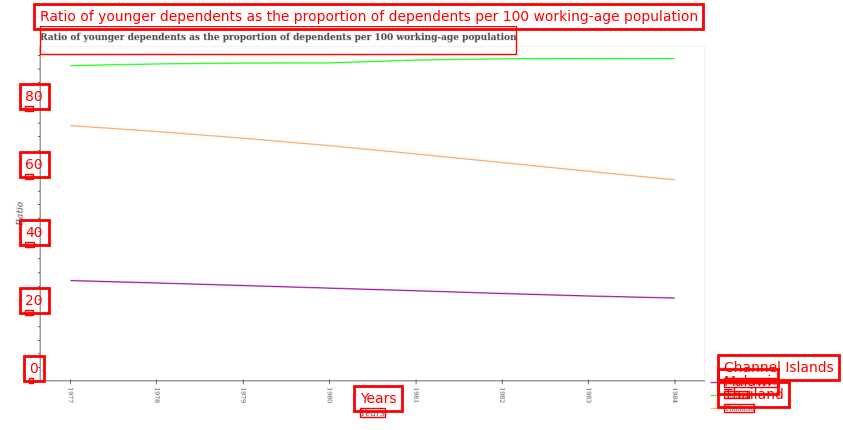

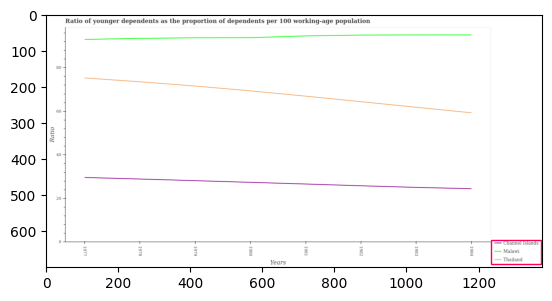

{'x': 1305.0, 'y': 657.0, 'width': 138.0, 'height': 68.0, 'confidence': 0.8861502408981323, 'class': 'legend', 'class_id': 1, 'detection_id': 'd0f3fe2e-7d18-4833-a349-57ca1a0fe423', 'image_path': '../plot_images/19017.png', 'prediction_type': 'ObjectDetectionModel'}


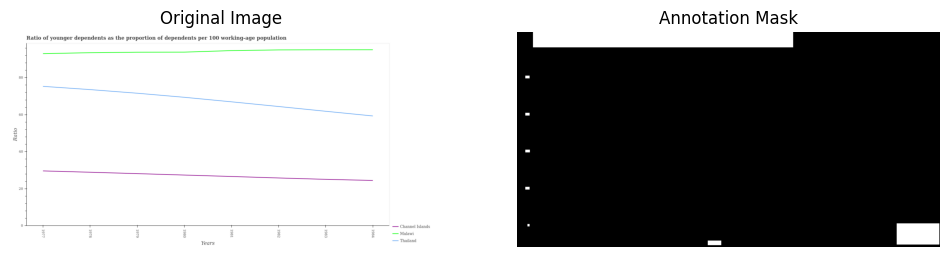

LEGEND ITEM Channel Islands
LEGEND ITEM Malawi
LEGEND ITEM Thailand
Y MIN 0
Y MAX 80
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 80.0
Y
OCR DIFF -482.5
SEM DIFF 80.0
OCR RATIO -6.03125
PIXEL DIFF -1.0
REAL DIFF FROM BASE POINT 0.16580310880829016
Y_MIN -0.16580310880829016
Y_MAX 98.48704663212435
x is in fault condition
{'white': 939321, 'lightgrey': 1466, 'black': 8322, 'silver': 404, 'darkslategrey': 715, 'lightslategrey': 72, 'whitesmoke': 1603, 'snow': 193, 'dimgrey': 428, 'ghostwhite': 95, 'grey': 336, 'lavender': 1365, 'darkgray': 501, 'gainsboro': 951, 'mintcream': 24, 'honeydew': 95, 'beige': 78, 'powderblue': 13, 'palegreen': 213, 'lightgreen': 208, 'limegreen': 199, 'lime': 2315, 'sandybrown': 298, 'orangered': 1453, 'darkorange': 327, 'coral': 217, 'lightsalmon': 145, 'burlywood': 125, 'navajowhite': 178, 'peachpuff': 96, 'bisque': 86, 'linen': 41, 'goldenrod': 16, 'antiquewhite': 83, 'seashell': 34, 'oldlace': 35, 'blanchedalmond': 38, 'floralwhite': 41, 'darkorchid': 131, 'indigo': 

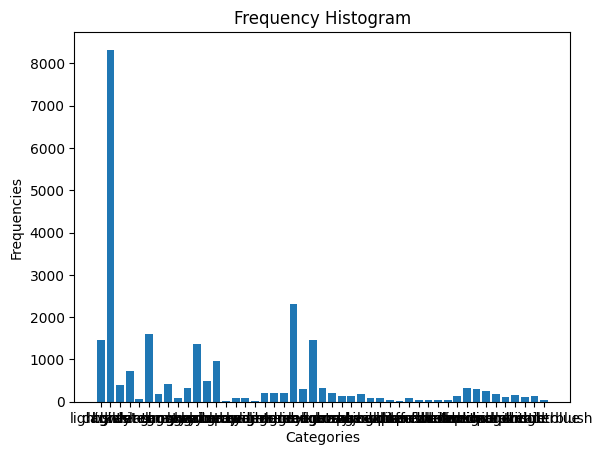

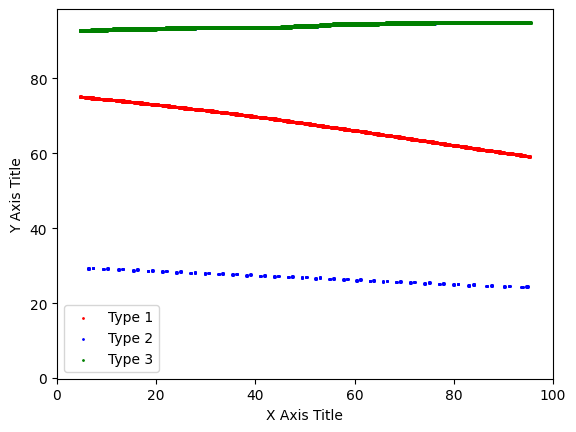

SUCCEEDED ON IMAGE 19017


In [6]:
for image_num in [19764, 17074, 4759, 19017]:
    print("IMAGE #" + str(image_num))
    image_name = '../plot_images/' + str(image_num) + '.png'
    image_bgr = cv2.imread(image_name)
    image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.axis('off') 
    plt.imshow(image)
    try:
        run_pipeline(image_num, 200, sam_predictor, model)
        print("SUCCEEDED ON IMAGE", image_num)
    except:
        print("FAILED ON IMAGE", image_num)

In [ ]:
for image_num in [4398, 4676, 19933, 299, 20674, 18630]:
    print("IMAGE #" + str(image_num))
    image_name = '../plot_images/' + str(image_num) + '.png'
    image_bgr = cv2.imread(image_name)
    image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.axis('off') 
    plt.imshow(image)
    
    run_pipeline(image_num, 200, sam_predictor, model)
    print("SUCCEEDED ON IMAGE", image_num)

: 

: 